<a href="https://colab.research.google.com/github/sinara08/Practice_Python/blob/main/numpy_and_pandas/Tasks/task_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [2]:
# code here
df = pd.read_csv('https://tinyurl.com/2pfhncqw')
df.head(20)

,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,250,False,False,True,True,False,31,187.967742,8.290323,60.935484,0,0,2,591,28,380
1,1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
3,3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
4,4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
5,5,179.395901,2021-08,2.001691,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
6,6,152.067286,2021-10,2.502283,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
7,7,139.320270,2022-08,3.191687,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
8,8,107.340146,2021-08,1.996968,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
9,9,144.603692,2022-10,2.730321,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239


In [6]:
df['last_sale_price'].value_counts()
df.pivot_table(index='verification_status', columns=['contract_type'],values=['rarity_score','last_sale_price'],aggfunc='sum')
#

last_sale_price                 rarity_score              
contract_type               default            own       default           own
verification_status                                                           
approved                 658.931935    1684.819488  3.973082e+08  3.929607e+06
verified                 370.304092  667394.862655  2.475007e+06  4.165654e+07

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [ ]:
# code here
df1 = pd.read_csv('https://tinyurl.com/2r24n45l')
df1.head(20)

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
5,Buick Encore,2019,47973,18590
6,Jeep Compass,2016,57159,17590
7,Jeep Compass,2017,47619,18590
8,Jeep Patriot,2015,51472,17590
9,Jeep Compass,2016,33218,17990


In [ ]:
df1['Brand']=df1['Name'].str.split().str.get(0)
df1['Year']=df1['Year'].astype('str').str[:4].astype('int')

In [ ]:
df1[(df1['Year'] >= 2018) & (df1['Year'] < 2023) ].pivot_table(index='Brand', columns='Year', values=['Price','Miles'], aggfunc={'Price':'mean', 'Miles':'median'}, fill_value=0)

Miles                                             Price  \
Year              2018     2019     2020     2021     2022          2018   
Brand                                                                      
Acura          32516.0  50959.0  30894.0  10922.0      0.0  25323.333333   
Alfa           38908.0  20928.0      0.0      0.0      0.0  28490.000000   
Audi           49762.0  50169.5  30423.5  11205.0  20917.0  30345.555556   
BMW            39269.0  36306.0  23171.0  19978.0   3780.0  31762.093023   
Buick          50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   
Cadillac       57116.0  29609.0  41046.0      0.0      0.0  28390.000000   
Chevrolet      53355.0  46375.0  50743.0  37527.0  13022.0  21262.413043   
Chrysler       64685.5  65963.0  48960.0  44225.0  24427.0  24125.062500   
Dodge          78986.0  65497.0  30995.5  32159.5   9089.0  20807.283951   
FIAT           24731.0  14573.0      0.0      0.0      0.0  22602.500000   
Ford           50572.0  47657.5  49136.0  22391.0   5298.5  20214.190283   
GMC            54181.0  54017.0  54055.0  41904.5   9854.0  26052.206897   
Genesis        42192.0  16855.0      0.0  16937.0  13938.5  28839.000000   
Honda          46242.0  39322.0  35812.0   9286.0  18500.0  24265.054054   
Hyundai        56075.0  44910.0  35882.5  31592.0   8160.0  19335.487603   
INFINITI       49555.5  61327.0  47858.0  35966.0      0.0  26140.000000   
Jaguar         35119.0  30563.0  17456.0   6943.0      0.0  33323.333333   
Jeep           53690.5  21836.5  41416.0  44188.5   8662.5  21362.570175   
Kia            37993.0  27189.0  37605.0  32006.0  14114.0  21565.608108   
Land           58929.0  41484.0  36232.0      0.0      0.0  39990.000000   
Lexus          53174.0  25356.5  21377.5  18073.0  20985.0  36056.666667   
Lincoln        43874.0  23501.5  50080.0      0.0   9494.0  26462.785714   
MAZDA          44267.0  37844.0  31832.0  41606.0   2338.0  22720.603448   
MINI           36562.0  35508.0  13268.0      0.0   5758.5  25065.000000   
Maserati           0.0  28766.0      0.0      0.0   5339.0      0.000000   
Mercedes-Benz  31408.5  28937.0  22008.0  12435.0  10880.0  34910.000000   
Mitsubishi     48827.0  45100.0  39941.0  31809.0   6774.0  17137.058824   
Nissan         39266.0  37208.0  49741.0  41186.0   9975.0  20050.358209   
Polestar           0.0      0.0      0.0      0.0   6188.0      0.000000   
Porsche        47451.0      0.0      0.0      0.0      0.0  45156.666667   
Ram            43299.0  41717.5  27715.5  30617.0   3664.5  34990.000000   
Subaru         51900.0  40909.0  19885.0  44615.0   9899.0  23732.857143   
Tesla          32481.0  26977.5  24383.0  15517.0   6454.0  42923.333333   
Toyota         45770.0  19796.0  37726.0  20862.0   6769.0  22926.622449   
Volkswagen     50991.0  46335.0  30069.0  23098.0  14056.5  21447.142857   
Volvo          79121.0  23902.0  41457.5  36590.0   1758.0  27306.666667   
smart          14825.0      0.0      0.0      0.0      0.0  17765.000000   

                                                                        
Year                   2019          2020          2021           2022  
Brand                                                                   
Acura          34496.777778  37590.000000  43856.666667       0.000000  
Alfa           30475.714286      0.000000      0.000000       0.000000  
Audi           28590.000000  32490.000000  71990.000000   39590.000000  
BMW            33280.909091  39811.083333  37062.727273   57030.000000  
Buick          21033.632653  24141.947368  25796.842105   26940.000000  
Cadillac       32290.000000  38777.266667      0.000000       0.000000  
Chevrolet      21119.717647  24684.226950  25234.727273   42358.421053  
Chrysler       26628.142857  28668.142857  26471.978723   35190.000000  
Dodge          23036.666667  26782.535714  32565.357143   36256.666667  
FIAT           23904.285714      0.000000      0.000000       0.000000  
Ford           21698.428571

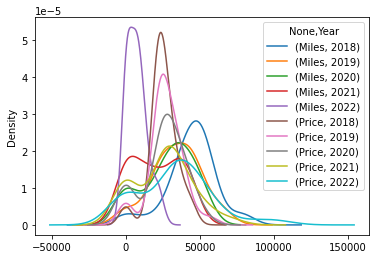

In [ ]:
df1[(df1['Year'] >= 2018) & (df1['Year'] < 2023) ].pivot_table(index='Brand', columns='Year', values=['Price','Miles'], aggfunc={'Price':'mean', 'Miles':'median'}, fill_value=0).plot.kde()

In [ ]:
#Given solution to restrict an integer to be 4 digits
df['Year'] = df['Year'].apply(lambda x:int(re.findall(r"\d{4}", str(x))[0]))

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [21]:
# code here
df2 = pd.read_csv('https://tinyurl.com/2nq6kugt')
df2.head(20)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.40,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.00,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.00,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.00,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.30,2697.65,77.65,2620.0,0,39,17,-21.69,0.0
5,2017-09-01,Rajasthan,6864.80,3283.50,1410.00,1505.0,0,83,69,-14.41,0.0
6,2017-09-01,Uttarakhand,1252.15,334.00,258.00,76.0,0,19,19,0.11,0.0
7,2017-09-01,Uttar Pradesh,6274.60,2505.60,377.00,2128.6,0,103,68,-35.29,0.0
8,2017-09-01,ADHPL,192.00,0.00,0.00,0.0,0,2,3,1.05,0.0
9,2017-09-01,AHPC (GVK),330.00,0.00,0.00,0.0,0,6,8,1.37,0.0


In [22]:
df2['Dates']=pd.to_datetime(df2['Dates'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345273 entries, 0 to 345272
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Dates                             345273 non-null  datetime64[ns]
 1   Power Station                     345273 non-null  object        
 2   Monitored Cap.(MW)                345273 non-null  float64       
 3   Total Cap. Under Maintenace (MW)  345273 non-null  float64       
 4   Planned Maintanence (MW)          345273 non-null  float64       
 5   Forced Maintanence(MW)            345273 non-null  float64       
 6   Other Reasons (MW)                345273 non-null  int64         
 7   Programme or Expected(MU)         345273 non-null  int64         
 8   Actual(MU)                        345273 non-null  int64         
 9   Excess(+) / Shortfall (-)         345273 non-null  float64       
 10  Deviation                       

In [23]:
df2['Month'] = df2['Dates'].dt.month_name()
df2['Actual_Reqd_Power_Generation'] = df2['Actual(MU)'] - df2['Excess(+) / Shortfall (-)'] 

In [ ]:
#df2['Excess(+) / Shortfall (-)'].apply(lambda x:5 + x if x <= 0 else 5 - x)
#df2.loc[(df2['Excess(+) / Shortfall (-)'] <= 0 ), 'Actual_Reqd_Power_Generation'] = df2['Actual(MU)'] + df2['Excess(+) / Shortfall (-)'] 
#df2.loc[(df2['Excess(+) / Shortfall (-)'] > 0 ), 'Actual_Reqd_Power_Generation'] = df2['Actual(MU)'] - df2['Excess(+) / Shortfall (-)'] 

In [27]:
top_10 = df2['Power Station'].value_counts().sort_values(ascending=False).head(10).index.to_list()
top_10

['NTPC Ltd.',
 'GMR ENERG',
 'NHPC',
 'NPCIL',
 'JSWEL',
 'TATA PCL',
 'IBPIL',
 'APL',
 'JPPVL',
 'NLC']

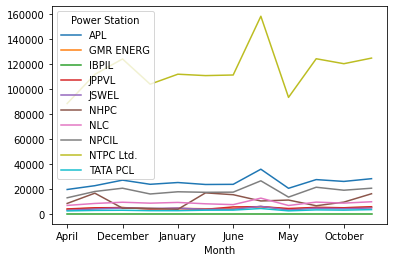

In [28]:
df2[df2['Power Station'].isin(top_10)].pivot_table(index='Month',columns='Power Station',values='Actual_Reqd_Power_Generation',aggfunc='sum').plot(kind='line')

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [31]:
# code here
df3 = pd.read_csv("https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link")
df3

,"<!DOCTYPE html><html><head><meta name=""google"" content=""notranslate""><meta http-equiv=""X-UA-Compatible"" content=""IE=edge;""><style nonce=""wEIafQTgQymlJcFgO2UdVA"">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name=""referrer"" content=""origin""><title>question-answer.csv - Google Drive</title><meta property=""og:title"" content=""question-answer.csv""><meta property=""og:type"" content=""article""><meta property=""og:site_name"" content=""Google Docs""><meta property=""og:url"" content=""https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link&amp;usp=embed_facebook""><meta property=""og:image"" content=""https://lh6.googleusercontent.com/PpqZ4UHB3o0QX4nZlMjJ148y_o2dHKHK3kGIRaPOY_uqU1ZuTv-cqZY6BOl1V0891s8=w1200-h630-p""><meta property=""og:image:width"" content=""1200""><meta property=""og:image:height"" content=""630""><link rel=""shortcut icon"" href=""https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png""><link rel=""stylesheet"" href=""https://fonts.googleapis.com/css?family=Google+Sans:300",400,500,"700"" nonce=""wEIafQTgQymlJcFgO2UdVA""><link rel=""stylesheet"" href=""https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v.m0FHGDblE-o.L.X.O/am=ACA/d=0/rs=AO0039sf3J9322T5yHSjFDA-jS7QZd6Wrw"" nonce=""wEIafQTgQymlJcFgO2UdVA""><script nonce=""tPdB7Z01UppSRZGfR6X9kQ"">_docs_flag_initialData={""docs-ails"":""docs_cold""","docs-fwds:""docs_sdf""","docs-crs:""docs_crs_nfd""",docs-l2t:0,docs-shdn:0,"docs-tfh:""""",info_params:{},docs-eohmo:false,"uls:""""","docs-obsImUrl:""https://ssl.gstatic.com/docs/common/netcheck.gif""",docs-api-keys:{},"buildLabel:""apps-fileview.texmex_20230112.01_p0""",docs-show_debug_info:false,"ondlburl:""https://docs.google.com""","drive_url:""https://drive.google.com""","app_url:""https://drive.google.com/file/""",docs-itrf:false,"docs-gsmd:""""",docs-eidfc:false,docs-msid:32767,docs-mif:1000,docs-icdmt:[],docs-rauiu:false,docs-mip:6250000,docs-eatt:false,docs-mib:5242880,docs-mid:2048,docs-rid:1024,"docs-sup:""/file""","docs-seu:""https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/edit""","docs-crp:""/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view""","docs-crq:""usp\u003dshare_link""","docs-uptc:[""lsrp""",ca,sh,noreplica,ouid,dl,hi,hi_ext,usp,urp,utm_source,utm_medium,utm_campaign,utm_term,utm_content,aaac,sle],"docs-doddn:""""","docs-uddn:""""","docs-cwsd:""""",docs-epq:false,docs-erdiiv:false,docs-ecei:false,"docs-acap:[""docs.security.access_capabilities""",1,1.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,1.2,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0],"docs-ci:""10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY""",docs-eccfs:false,docs-eefufd:false,"docs-ndt:""Untitled Texmex""","docs-prn:""""",docs-een:false,"docs-as:""""",docs-etdimo:false,"docs-mdck:""""",docs-mriim:1800000,docs-eccbs:false,docs-rlmp:false,docs-mmpt:15000,docs-erd:false,docs-erfar:false,docs-ensb:false,docs-ddts:false,docs-uootuns:false,docs-amawso:false,docs-ofmpp:false,docs-anlpfdo:false,docs-eslars:true,docs-eem:false,"docs-phe:""https://contacts.google.com""","docs-glu:""""","docs-wsu:""""","docs-wsup:""""","docs-pse:""PROD""","docs-sccfo:""PROD""",docs-eridm:false,"docs-pid:""""",docs-eedmlf:false,docs-emmda:false,docs-ricocpb:false,do

In [ ]:
df4=pd.DataFrame()
df4['question'] = df3[df3['2'].str.startswith('Q')]['2'].str.split('-').str.get(1)
df4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df4 = df4.reset_index(drop=True)
df4['answers']=df3[df3['2'].str.startswith('A')]['2'].str.split('-').str.get(1).reset_index(drop=True)
df4

,question,answers
0,What is Data Science?,"Data Science combines statistics, maths, speci..."
1,2. How is logistic regression done?,Logistic regression measures the relationship ...
2,How do you build a random forest model?,A random forest is built up of a number of dec...
3,How can you avoid overfitting your model?,Overfitting refers to a model that is only set...
4,You are given a data set consisting of variabl...,The following are ways to handle missing data ...
5,What is bag of words? How we can use it for te...,Bag of Words is a representation of text that ...
6,How can we use machine learning for text class...,Machine learning classification algorithms pre...
7,What is a time series?,A time series is a set of observations ordered...
8,How is time series different from the usual re...,The principle behind causal forecasting is tha...
9,What are the different types of joins? What ar...,(INNER) JOIN: Returns records that have matchi...


###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [ ]:
# code here
df4[~df4['question'].str.contains('\?')]

,question,answers


###`Q 6-10` LOG and EMPLOYEE 
6. Show `activity` details month wise. Show count for each `activity` 
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [ ]:
# code here
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [ ]:
log_file[log_file['Month']=='January']

,Log_ID,dt,dept,emp_id,activity,eqpt,Month
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January
4,1004,2022-01-11,Dept3,138,Checking,Battery,January
5,1005,2022-01-12,Dept6,143,Inspection,AC,January
6,1006,2022-01-13,Dept3,116,Repair,Pump,January
7,1007,2022-01-14,Dept4,131,Repair,Server,January
8,1008,2022-01-15,Dept1,143,Checking,UPS,January
9,1009,2022-01-16,Dept3,120,Inspection,CPU,January


In [ ]:
employee.head(5)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [ ]:
#log_file.pivot_table(index='activity',columns=)
log_file['dt'] = pd.to_datetime(log_file['dt'])
log_file['Month'] = log_file['dt'].dt.month_name()

log_file.pivot_table(index='Month',columns='activity', values='Log_ID',aggfunc='count')

activity,Checking,Cleaning,Inspection,Repair
Month,,,,
April,5,11,9,5
August,8,10,9,4
December,6,7,12,6
February,7,7,4,10
January,7,10,9,5
July,6,6,14,5
June,5,7,8,10
March,8,6,5,12
May,5,8,7,11


In [ ]:
log_file[log_file['Month']=='January']['emp_id'].value_counts().head(1).index[0]

122

In [ ]:

log_file['day_of_week']=log_file['dt'].dt.day_of_week

In [ ]:
log_file

,Log_ID,dt,dept,emp_id,activity,eqpt,Month,day_of_week
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,4
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January,5
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January,6
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January,0
4,1004,2022-01-11,Dept3,138,Checking,Battery,January,1
...,...,...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC,January,0
361,1361,2023-01-03,Dept4,116,Checking,Server,January,1
362,1362,2023-01-04,Dept4,110,Checking,CPU,January,2
363,1363,2023-01-05,Dept4,102,Inspection,AC,January,3


In [ ]:
log_file[log_file['day_of_week'] > 4]['emp_id'].value_counts().index[0]

144

In [ ]:
log_file[log_file['day_of_week'] <= 4]['activity'].value_counts().index[0]

'Inspection'

In [ ]:
log_file['Day'] = log_file['dt'].dt.day_name()
log_file[log_file['day_of_week'] <= 4][['Day','activity']]

,Day,activity
0,Friday,Cleaning
3,Monday,Inspection
4,Tuesday,Checking
5,Wednesday,Inspection
6,Thursday,Repair
...,...,...
360,Monday,Repair
361,Tuesday,Checking
362,Wednesday,Checking
363,Thursday,Inspection


### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname). 

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [ ]:
# code here
employee.head(10)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET


In [ ]:
employee[employee['FIRST_NAME'].isnull()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
12,112,NaN,Urman,JMURMAN
21,121,NaN,Fripp,AFRIPP
32,132,NaN,Olson,TJOLSON


In [ ]:
employee[employee['FIRST_NAME'].isnull()]['EMAIL'].str[:len(employee['LAST_NAME'])]
#[:(employee['EMAIL'].str.len()-employee['LAST_NAME'].str.len())]
#'JMURMAN'.split('URMAN')[0]
#employee['EMAIL'].str.len()
'JMURMAN'[:len('Urman')]

'JMURM'